**Question**:
Handling Missing Data in a Healthcare Dataset





**1)Dataset Exploration**

In [19]:
import pandas as pd
df = pd.read_csv('/content/Day_15_Healthcare_Data.csv')
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374

**2)Identifying Missing Data**

In [21]:

missing_data_sum = df.isna().sum()
missing_data_percentage = (missing_data_sum / len(df)) * 100

print("Missing Data Summary:")
print(missing_data_sum)
print("\nPercentage of Missing Data:")
print(missing_data_percentage)


Missing Data Summary:
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Percentage of Missing Data:
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


**3)Analyze the pattern of Missing Data**

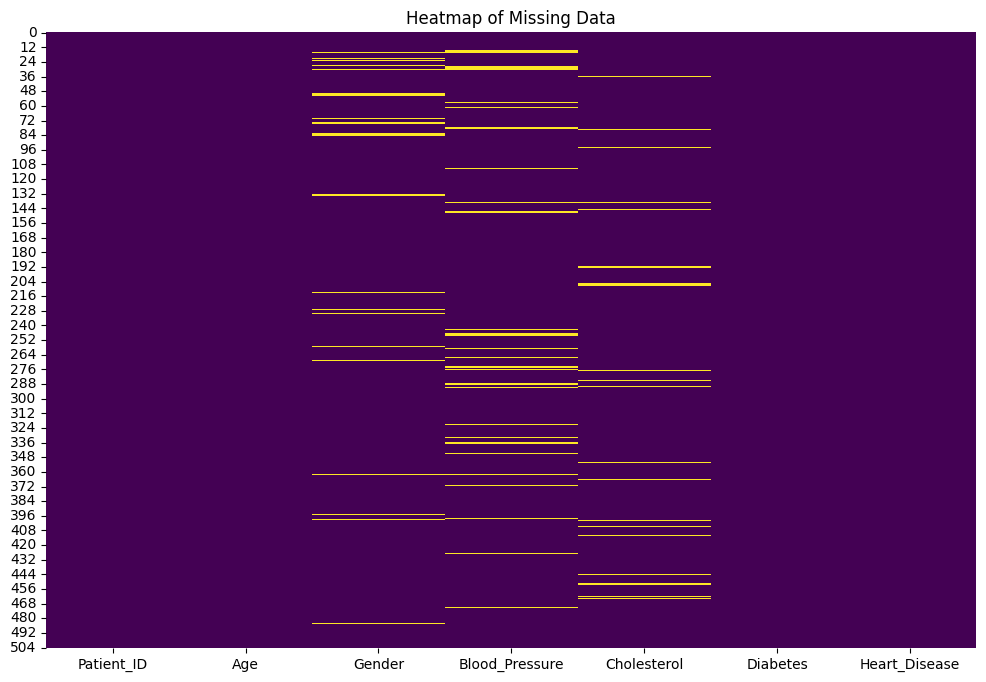

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


**4)Impute Missing Values**
4.1: Mean/Median Imputation for Numerical Columns

In [29]:

num_col = 'Blood_Pressure'
df[num_col].fillna(df[num_col].mean(), inplace=True)
df[num_col].fillna(df[num_col].median(), inplace=True)


<ipython-input-29-5d1e8b67b1a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[num_col].fillna(df[num_col].mean(), inplace=True)
<ipython-input-29-5d1e8b67b1a4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

4.2: Mode Imputation for Categorical Columns

In [31]:

cat_col = 'Age'
df[cat_col].fillna(df[cat_col].mode()[0], inplace=True)


<ipython-input-31-d837cb1d756a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat_col].fillna(df[cat_col].mode()[0], inplace=True)


4.3: K-Nearest Neighbors (KNN) Imputation

In [35]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [5, 4, 3, np.nan, 1]
})
if not all(df.dtypes == 'float64') and not all(df.dtypes == 'int64'):
    df = df.astype('float64')
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_knn_imputed)


     A    B     C
0  1.0  3.5  5.00
1  2.0  2.0  4.00
2  3.0  3.0  3.00
3  4.0  4.0  3.25
4  5.0  5.0  1.00


5)Evaluate the Effect of Imputation

In [42]:

print("Statistical Analysis Before and After Imputation:")
print("Before Imputation:\n", df.describe())
print("After Imputation (KNN):\n", df_knn_imputed.describe())


Statistical Analysis Before and After Imputation:
Before Imputation:
               A         B         C
count  4.000000  4.000000  4.000000
mean   3.000000  3.500000  3.250000
std    1.825742  1.290994  1.707825
min    1.000000  2.000000  1.000000
25%    1.750000  2.750000  2.500000
50%    3.000000  3.500000  3.500000
75%    4.250000  4.250000  4.250000
max    5.000000  5.000000  5.000000
After Imputation (KNN):
               A         B        C
count  5.000000  5.000000  5.00000
mean   3.000000  3.500000  3.25000
std    1.581139  1.118034  1.47902
min    1.000000  2.000000  1.00000
25%    2.000000  3.000000  3.00000
50%    3.000000  3.500000  3.25000
75%    4.000000  4.000000  4.00000
max    5.000000  5.000000  5.00000


Save the Cleaned Dataset

In [48]:

df.to_csv('cleaned_healthcare_dataset.csv', index=False)
df_knn_imputed.to_csv('knn_imputed_healthcare_dataset.csv', index=False)
